# UCDD on spam evaluation

## Accept and preprocess the spam dataset

In [3]:
import numpy as np
import pandas as pd

In [13]:
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("../Datasets_concept_drift/real_world_data/spam_dataset.csv")

print('df columns')
print(df.columns)

X = df.drop(columns=['Unnamed: 0', 'ACTUAL_LABEL'])
y = df["ACTUAL_LABEL"]

X_ref = X[:1468]
X_test = X[1468:]
y_ref = y[:1468]
y_test = y[1468:]

X_ref = X_ref.to_numpy()
X_test = X_test.to_numpy()
y_ref = y_ref.to_numpy().reshape((len(y_ref.index), 1))
y_test = y_test.to_numpy().reshape((len(y_test.index), 1))

print('\nreference data')
print(X_ref.shape)
print(X_ref)
print('\nreference labels')
print(y_ref.shape)
print('\ntesting data')
print(X_test.shape)
print(X_test)
print('\ntesting labels')
print(y_test.shape)

df columns
Index(['Unnamed: 0', 'aa', 'aba', 'abandon', 'abb', 'abbey', 'abbrevi',
       'abdomin', 'abduct', 'aberr',
       ...
       'zig', 'zimbabw', 'zinc', 'zip', 'zodiac', 'zone', 'zoo', 'zoom',
       'zowi', 'ACTUAL_LABEL'],
      dtype='object', length=10729)

reference data
(1468, 10727)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

reference labels
(1468, 1)

testing data
(2937, 10727)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

testing labels
(2937, 1)


### Save spam dataset drift definitions

In [44]:
# drift definitions copied from
# https://github.com/konstaka/drift-definitions/blob/main/spam_drift.ipynb
import csv

def fun(lst, num):
    return [(i in lst) for i in list(range(1, num + 1))]

def savefun(filename, thing):
    with open(filename, 'w') as f:
        wrtr = csv.writer(f)
        wrtr.writerow(thing)

sequential_100_def = [7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
sequential_100_def_bool = fun(sequential_100_def, 29)
time_based_100_def = [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
time_based_100_def_bool = fun(time_based_100_def, 29)
sequential_50_def = [11, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58]
sequential_50_def_bool = fun(sequential_50_def, 58)
time_based_50_def = [1, 3, 4, 5, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
time_based_50_def_bool = fun(time_based_50_def, 58)
sequential_20_def = [10, 14, 21, 26, 32, 33, 35, 36, 37, 39, 40, 41, 42, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 60, 61, 62, 63, 67, 68, 72, 73, 76, 78, 80, 81, 82, 83, 85, 86, 87, 88, 91, 92, 93, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 130, 131, 132, 135, 136, 137, 138, 139, 141, 142, 143, 145]
sequential_20_def_bool = fun(sequential_20_def, 146)
time_based_20_def = [2, 10, 11, 14, 17, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 88, 90, 92, 93, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
time_based_20_def_bool = fun(time_based_20_def, 146)

# savefun('spam_sequential_100.csv', sequential_100_def_bool)
# savefun('spam_time_based_100.csv', time_based_100_def_bool)
# savefun('spam_sequential_50.csv', sequential_50_def_bool)
# savefun('spam_time_based_50.csv', time_based_50_def_bool)
# savefun('spam_sequential_20.csv', sequential_20_def_bool)
# savefun('spam_time_based_20.csv', time_based_20_def_bool)

## Split the dataset to batches

### Size=100

In [14]:
from eval_helpers import helpers

X_test_batches_100, y_test_batches_100 = helpers.split_to_fixed_size_batches(X_test, y_test, batch_size=100)
X_ref_batches_100, y_ref_batches_100 = helpers.split_to_fixed_size_batches(X_ref, y_ref, batch_size=100)

print('# test batches 100:')
print(len(X_test_batches_100))
print(len(y_test_batches_100))
print('# ref batches 100:')
print(len(X_ref_batches_100))
print(len(y_ref_batches_100))

chunk size 100
number of chunks 29
number of data 2937
shape of X that can be split perfectly (2900, 10727)
number of resulting batches 29
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 10727)
chunk size 100
number of chunks 14
number of data 1468
shape of X that can be split perfectly (1400, 10727)
number of resulting batches 14
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 10727)
# test batches 100:
29
29
# ref batches 100:
14
14


### Size=50

In [15]:
from eval_helpers import helpers

X_test_batches_50, y_test_batches_50 = helpers.split_to_fixed_size_batches(X_test, y_test, batch_size=50)
X_ref_batches_50, y_ref_batches_50 = helpers.split_to_fixed_size_batches(X_ref, y_ref, batch_size=50)

print('# test batches 50:')
print(len(X_test_batches_50))
print(len(y_test_batches_50))
print('# ref batches 50:')
print(len(X_ref_batches_50))
print(len(y_ref_batches_50))

chunk size 50
number of chunks 58
number of data 2937
shape of X that can be split perfectly (2900, 10727)
number of resulting batches 58
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(50, 10727)
chunk size 50
number of chunks 29
number of data 1468
shape of X that can be split perfectly (1450, 10727)
number of resulting batches 29
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(50, 10727)
# test batches 50:
58
58
# ref batches 50:
29
29


### Size=20

In [16]:
from eval_helpers import helpers

X_test_batches_20, y_test_batches_20 = helpers.split_to_fixed_size_batches(X_test, y_test, batch_size=20)
X_ref_batches_20, y_ref_batches_20 = helpers.split_to_fixed_size_batches(X_ref, y_ref, batch_size=20)

print('# test batches 20:')
print(len(X_test_batches_20))
print(len(y_test_batches_20))
print('# ref batches 20:')
print(len(X_ref_batches_20))
print(len(y_ref_batches_20))


chunk size 20
number of chunks 146
number of data 2937
shape of X that can be split perfectly (2920, 10727)
number of resulting batches 146
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20, 10727)
chunk size 20
number of chunks 73
number of data 1468
shape of X that can be split perfectly (1460, 10727)
number of resulting batches 73
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20, 10727)
# test batches 20:
146
146
# ref batches 20:
73
73


## Evaluation with size 100 batches

In [28]:
import importlib
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers
importlib.reload(mssw_preprocessing)

weighted_joined_reference_data_100, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_100, X_test_batches_100)

filename = 'spam100_output.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data_100,
                                                    n_clusters=10, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 4
minimum initial inertia: 1.294805736933006
maximum initial inertia: 4.125607185274287
number of unique final inertia values: 47
minimum final inertia: 1.2459998155484449
maximum final inertia: 1.3017038790019373
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


### Try different numbers of clusters

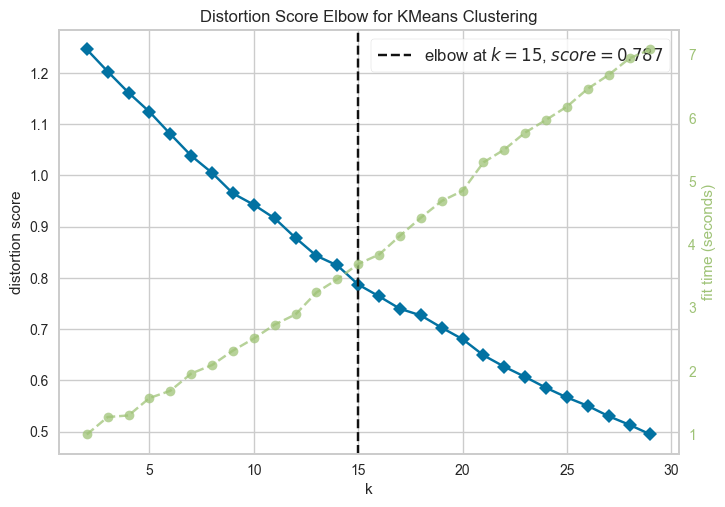

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [25]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data_100, k=(2, 30))

### Evaluate with sequential drift definitions

In [47]:
import csv


with open('../Datasets_concept_drift/real_world_data_drifts/spam/spam_sequential_100.csv') as f:
    rdr = csv.reader(f)
    seq_100_def_drifts = rdr.__next__()

seq_100_def_drifts = [s == 'True' for s in seq_100_def_drifts]

print('defined drifts', seq_100_def_drifts)

defined drifts [False, False, False, False, False, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True]


In [48]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_100,
    testing_data_batches=X_test_batches_100,
    true_drift_bool=seq_100_def_drifts,
    n_clusters=15, n_init=100, max_iter=40, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('spam 100 sequential def mean FPR:', fpr_mean)
print('spam 100 sequential def mean detection accuracy:', det_acc_mean)


min_runs 2
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True]
spam 100 sequential def mean FPR: 0.0
spam 100 sequential def mean detection accuracy: 0.0


In [53]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        X_ref_batches_100,
        X_test_batches_100,
        n_clusters=15,
        n_init=100,
        max_iter=130,
        tol=0,
        random_state=0
    )

print('# drifts detected', np.sum(drifts_detected))
print('lower bound', LCL_Av_s)
print('upper bound', UCL_Av_s)
# print('all_av_c', all_av_c)
print('all_av_sr', all_av_sr)
print('reference av_sr', all_av_sr[:, :len(X_ref_batches_100)])

mean_av_s 0.17209686097940732
mean_mr 0.0196483065208834
# drifts detected 0
lower bound 0.11983236563385748
upper bound 0.22436135632495718
all_av_sr [[0.07672994 0.15966436 0.19287235 0.17948892 0.18401342 0.16324069
  0.17240688 0.17703455 0.19273372 0.17484934 0.1848429  0.18131724
  0.19706242 0.17309932 0.17626391 0.1781072  0.19377051 0.21352167
  0.21409441 0.216079   0.21829158 0.20510115 0.19328083 0.1825524
  0.19389315 0.18199368 0.20934009 0.1976761  0.21228346 0.19057605
  0.20249103 0.19450478 0.20614081 0.20475586 0.20215989 0.20979189
  0.21207145 0.21133664 0.2049627  0.20339112 0.1998522  0.20566669
  0.19258559]]
reference av_sr [[0.07672994 0.15966436 0.19287235 0.17948892 0.18401342 0.16324069
  0.17240688 0.17703455 0.19273372 0.17484934 0.1848429  0.18131724
  0.19706242 0.17309932]]


### Evaluate with time-based drift definitions

In [ ]:
import csv


with open('../Datasets_concept_drift/real_world_data_drifts/spam/spam_time_based_100.csv') as f:
    rdr = csv.reader(f)
    time_100_def_drifts = rdr.__next__()

time_100_def_drifts = [s == 'True' for s in time_100_def_drifts]

print('defined drifts', time_100_def_drifts)

In [ ]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_100,
    testing_data_batches=X_test_batches_100,
    true_drift_bool=time_100_def_drifts,
    n_clusters=15, n_init=100, max_iter=40, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('spam 100 sequential def mean FPR:', fpr_mean)
print('spam 100 sequential def mean detection accuracy:', det_acc_mean)


## Evaluation with size 50 batches

In [32]:
import importlib
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers
importlib.reload(mssw_preprocessing)

weighted_joined_reference_data_50, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_50, X_test_batches_50)

filename = 'spam50_output.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data_50,
                                                    n_clusters=10, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 3
minimum initial inertia: 1.1593358340156819
maximum initial inertia: 2.5730626063762734
number of unique final inertia values: 36
minimum final inertia: 1.0876634747131242
maximum final inertia: 1.163854974472732
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

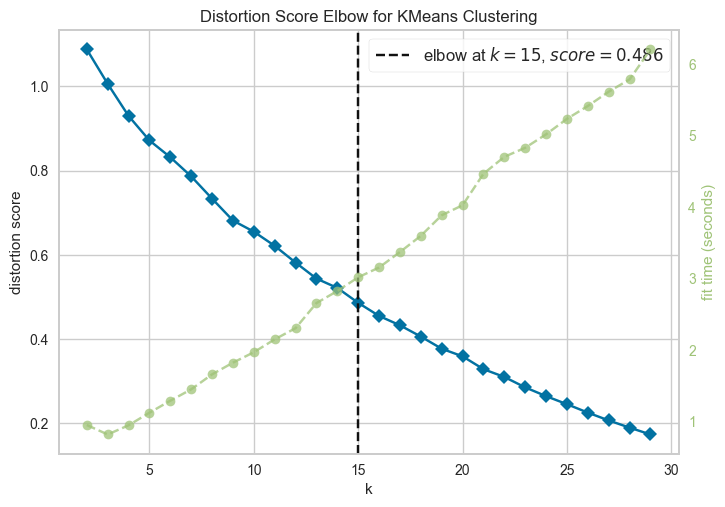

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [27]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data_50, k=(2, 30))

In [54]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        X_ref_batches_50,
        X_test_batches_50,
        n_clusters=15,
        n_init=100,
        max_iter=100,
        tol=0,
        random_state=0
    )

print('# drifts detected', np.sum(drifts_detected))
print('lower bound', LCL_Av_s)
print('upper bound', UCL_Av_s)
# print('all_av_c', all_av_c)
print('all_av_sr', all_av_sr)
print('reference av_sr', all_av_sr[:, :len(X_ref_batches_100)])

mean_av_s 0.20076580192850563
mean_mr 0.018606104578949678
# drifts detected 0
lower bound 0.15127356374849948
upper bound 0.25025804010851177
all_av_sr [[0.07981404 0.19285362 0.20276765 0.19179282 0.21156507 0.21141298
  0.1909378  0.2056947  0.24322218 0.21709543 0.18351091 0.20010201
  0.20397181 0.18844068 0.2062846  0.19507676 0.21136775 0.20109997
  0.19667827 0.20963719 0.20922459 0.19059229 0.21634681 0.21721612
  0.2249891  0.20026889 0.20351942 0.19199751 0.2247273  0.2098428
  0.21453325 0.19415989 0.22388019 0.2069367  0.21113719 0.20678148
  0.21326998 0.2090948  0.21983    0.23338817 0.22567015 0.22873202
  0.23509134 0.22231245 0.2119403  0.21562542 0.2235187  0.18573918
  0.2152836  0.22201131 0.20257016 0.18430487 0.21961026 0.23403387
  0.20702979 0.2106806  0.21075208 0.2084686  0.23067812 0.1976729
  0.20118132 0.20731507 0.20200701 0.22030055 0.19838802 0.19948213
  0.20635602 0.20812503 0.22565465 0.20420628 0.23068477 0.22919873
  0.18550932 0.23380102 0.2205010

## Evaluation with size 20 batches

In [29]:
import importlib
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers
importlib.reload(mssw_preprocessing)

weighted_joined_reference_data_20, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_20, X_test_batches_20)

filename = 'spam20_output.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data_20,
                                                    n_clusters=10, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 4
minimum initial inertia: 0.9533999460856086
maximum initial inertia: 2.5961719610261293
number of unique final inertia values: 18
minimum final inertia: 0.8283676844095011
maximum final inertia: 1.0033751376276785
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

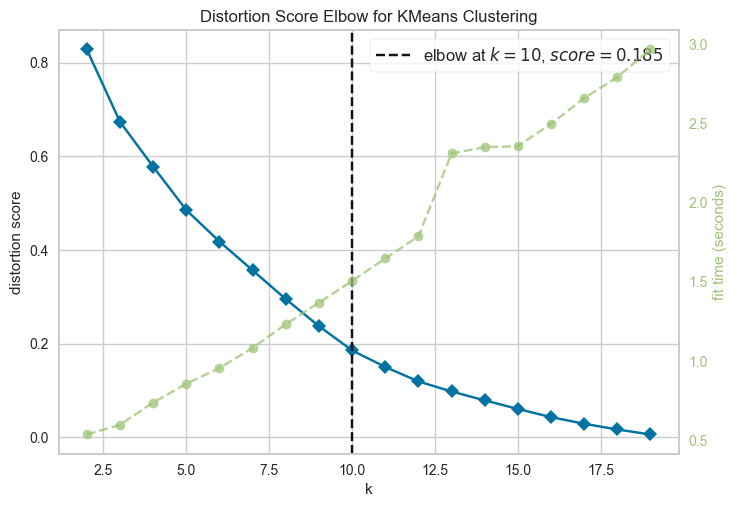

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=19, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 20))

In [31]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data_20, k=(2, 20))

In [55]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        X_ref_batches_50,
        X_test_batches_50,
        n_clusters=10,
        n_init=40,
        max_iter=100,
        tol=0,
        random_state=0
    )

print('# drifts detected', np.sum(drifts_detected))
print('lower bound', LCL_Av_s)
print('upper bound', UCL_Av_s)
# print('all_av_c', all_av_c)
print('all_av_sr', all_av_sr)
print('reference av_sr', all_av_sr[:, :len(X_ref_batches_50)])


mean_av_s 0.20119522493499956
mean_mr 0.018339747917574898
# drifts detected 0
lower bound 0.1524114954742503
upper bound 0.2499789543957488
all_av_sr [[0.09927078 0.19277961 0.19931863 0.18808002 0.21093397 0.21096205
  0.19072247 0.20533688 0.24295389 0.21685243 0.18338969 0.19995795
  0.20365161 0.18816489 0.20616188 0.1947962  0.21111284 0.20092934
  0.19649839 0.20941802 0.21232339 0.190254   0.21605883 0.21699783
  0.22471799 0.20001908 0.20671289 0.19182769 0.22445827 0.20969744
  0.21420698 0.19395571 0.22364219 0.20677627 0.21095116 0.20664249
  0.21304924 0.20893208 0.21961083 0.23319212 0.22543347 0.22553956
  0.23490128 0.22213686 0.21166188 0.21546876 0.22324449 0.18569856
  0.21512663 0.22188939 0.2023423  0.18417183 0.21940245 0.23382044
  0.20667919 0.21058538 0.21051441 0.20821976 0.23046624 0.19751304
  0.20104518 0.20714018 0.20195831 0.22001649 0.19813067 0.19933484
  0.20625159 0.20781029 0.22550733 0.20402426 0.23045505 0.22893772
  0.18539802 0.23362843 0.2203906